In [1]:
# Author -- Berkant Bayraktar

In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Input
from tensorflow.keras import utils
from tensorflow.keras import datasets
from tensorflow.keras import preprocessing

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [5]:
cifar10 = datasets.cifar10.load_data() # Load CIFAR10 Dataset using Keras API

In [6]:
((x_train, y_train),(x_test, y_test)) = cifar10

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


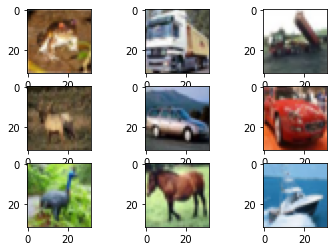

In [7]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i )
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [8]:
(x_train, x_test) = (x_train / 255, x_test / 255)
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [9]:
class berkantNET:
    def __init__(self,number_of_classes):
        self.model = None
        self.number_of_classes = number_of_classes
    def createModel(self):
        self.model = models.Sequential([
            Input(shape = (32,32,3)), 
            layers.Conv2D(32,(3,3), strides=(1,1), padding= 'same', activation = 'relu', use_bias=True, name = "layer_1"),
            layers.BatchNormalization(),
            layers.Conv2D(32,(3,3), strides=(1,1), padding= 'same', activation = 'relu', use_bias=True, name = "layer_2"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size = (2,2), strides = 2),
            layers.Conv2D(64,(3,3), strides=(1,1), padding= 'same', activation = 'relu', use_bias=True, name = "layer_3"),
            layers.BatchNormalization(),
            layers.Conv2D(64,(3,3), strides=(1,1), padding= 'same', activation = 'relu', use_bias=True, name = "layer_4"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size = (2,2), strides = 2),
            layers.Conv2D(128,(3,3), strides=(1,1), padding= 'same', activation = 'relu', use_bias=True, name = "layer_5"),
            layers.BatchNormalization(),
            layers.Conv2D(128,(3,3), strides=(1,1), padding= 'same', activation = 'relu', use_bias=True, name = "layer_6"),
            layers.BatchNormalization(),
            layers.MaxPooling2D(pool_size = (2,2), strides = 2),
            layers.Flatten(),
            layers.Dropout(rate = 0.5),
            layers.Dense(1024, activation= 'relu'),
            layers.Dropout(rate = 0.25),
            layers.Dense(128, activation= 'relu'),
            layers.Dropout(rate = 0.2),
            layers.Dense(10, activation='softmax')
        ])

In [10]:
bnet = berkantNET(number_of_classes=10)
bnet.createModel()

In [11]:
optimizer = optimizers.Adam(learning_rate = 0.001)
bnet.model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics= ['accuracy'])
res = bnet.model.fit(x = x_train, y = y_train, epochs=15, batch_size = 32, validation_data = (x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 23s 460us/sample - loss: 1.4856 - accuracy: 0.4702 - val_loss: 1.0849 - val_accuracy: 0.6165
Epoch 2/15
50000/50000 [==============================] - 21s 411us/sample - loss: 1.0151 - accuracy: 0.6520 - val_loss: 0.9980 - val_accuracy: 0.6591
Epoch 3/15
50000/50000 [==============================] - 21s 426us/sample - loss: 0.8435 - accuracy: 0.7157 - val_loss: 0.7717 - val_accuracy: 0.7472
Epoch 4/15
50000/50000 [==============================] - 21s 422us/sample - loss: 0.7348 - accuracy: 0.7526 - val_loss: 0.7149 - val_accuracy: 0.7591
Epoch 5/15
50000/50000 [==============================] - 21s 416us/sample - loss: 0.6587 - accuracy: 0.7800 - val_loss: 0.7524 - val_accuracy: 0.7547
Epoch 6/15
50000/50000 [==============================] - 21s 422us/sample - loss: 0.5879 - accuracy: 0.8046 - val_loss: 0.6840 - val_accuracy: 0.7745
Epoch 7/15
50000/50000 [====================

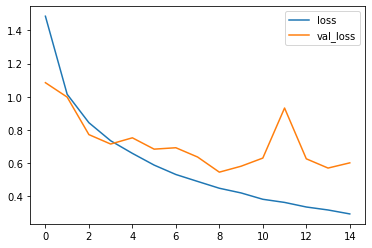

In [12]:
plt.plot(res.history['loss'], label = 'loss')
plt.plot(res.history['val_loss'], label = 'val_loss')
plt.legend()

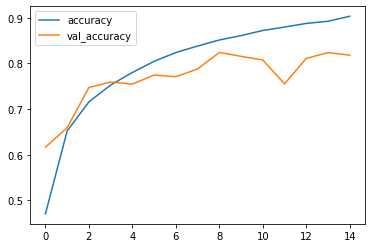

In [13]:
plt.plot(res.history['accuracy'], label = 'accuracy')
plt.plot(res.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [14]:
bnet.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Conv2D)             (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
layer_2 (Conv2D)             (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
layer_3 (Conv2D)             (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        2

In [16]:
bnet = berkantNET(number_of_classes=10)
bnet.createModel()
optimizer = optimizers.Adam(learning_rate = 0.001)
bnet.model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics= ['accuracy'])
data_generator = preprocessing.image.ImageDataGenerator(width_shift_range= 0.1, height_shift_range= 0.1 , horizontal_flip= True)
train_generator = data_generator.flow(x=x_train, y=y_train, batch_size= 32)
steps_per_epoch = len(train_generator)

In [17]:
res = bnet.model.fit_generator(generator=train_generator, steps_per_epoch= steps_per_epoch ,validation_data= (x_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6468 - accuracy: 0.4034 - val_loss: 1.3482 - val_accuracy: 0.5155
Epoch 2/15
1563/1563 [==============================] - 89s 57ms/step - loss: 1.1978 - accuracy: 0.5797 - val_loss: 1.0143 - val_accuracy: 0.6427
Epoch 3/15
1563/1563 [==============================] - 90s 57ms/step - loss: 1.0103 - accuracy: 0.6541 - val_loss: 0.9342 - val_accuracy: 0.6828
Epoch 4/15
1563/1563 [==============================] - 91s 58ms/step - loss: 0.9029 - accuracy: 0.6942 - val_loss: 0.8054 - val_accuracy: 0.7302
Epoch 5/15
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8294 - accuracy: 0.7228 - val_loss: 0.6903 - val_accuracy: 0.7641
Epoch 6/15
1563/1563 [==============================] - 84s 53ms/step - loss: 0.7640 - accuracy: 0.7427 - val_loss: 0.6597 - val_accuracy: 0.7702
Epoch 7/15
1563/1563 [==============================] - 89s 57ms/step - loss: 0.7224 - accuracy: 0.7612 - val_loss: 0.6677 -

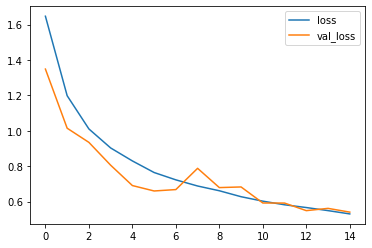

In [18]:
plt.plot(res.history['loss'], label = 'loss')
plt.plot(res.history['val_loss'], label = 'val_loss')
plt.legend()

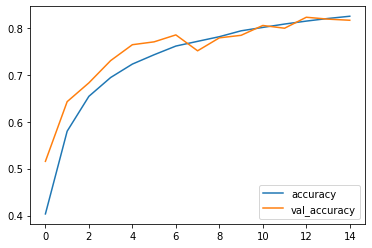

In [19]:
plt.plot(res.history['accuracy'], label = 'accuracy')
plt.plot(res.history['val_accuracy'], label = 'val_accuracy')
plt.legend()